Dataset link : https://www.kaggle.com/datasets/abhi8923shriv/sentiment-analysis-dataset?select=train.csv

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(
    "data/twitter_posts.csv",
    encoding="latin-1",
    usecols=["text", "sentiment"],
)
df.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [3]:
df = df[df['sentiment'].isin(['negative', 'positive'])]

In [4]:
df['sentiment'], map_ = pd.factorize(df['sentiment'])
dict(enumerate(map_))

{0: 'negative', 1: 'positive'}

In [ ]:
df = df.dropna(subset=["text"])
df["text"] = df["text"].astype(str).str.lower().str.replace("[^a-z ]", "", regex=True)

In [6]:
df.head()

,text,sentiment
1,Sooo SAD I will miss you here in San Diego!!!,0
2,my boss is bullying me...,0
3,what interview! leave me alone,0
4,"Sons of ****, why couldn`t they put them on t...",0
6,2am feedings for the baby are fun when he is a...,1


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['text']).toarray()

In [8]:
X[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5, 1000))

In [9]:
y = df["sentiment"]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [11]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=99)
model.fit(X_train, y_train)

,hidden_layer_sizes,"(100,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,99


In [12]:
y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8582340360525512

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86      1611
           1       0.87      0.84      0.86      1662

    accuracy                           0.86      3273
   macro avg       0.86      0.86      0.86      3273
weighted avg       0.86      0.86      0.86      3273



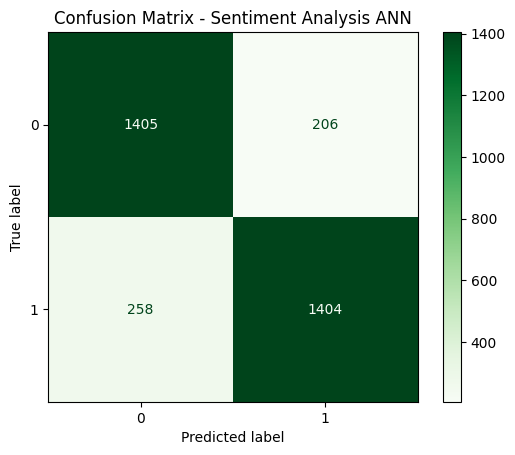

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap='Greens')
plt.title("Confusion Matrix - Sentiment Analysis ANN")
plt.show()